In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [ ]:
### dataset source :https://www.kaggle.com/datasets/yasserhessein/breast-cancer-coimbra-data-set?resource=download

In [3]:
df = pd.read_csv('dataR2.csv')
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [4]:
##Checking if there is null value
df.isnull().sum()


Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [5]:
df_copy = df.copy(deep = True) 
df_copy[['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']] = df_copy[['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']].replace(0,np.NaN)

# Showing the Count of NANs
print(df_copy.isnull().sum())

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2    64
1    52
Name: Classification, dtype: int64


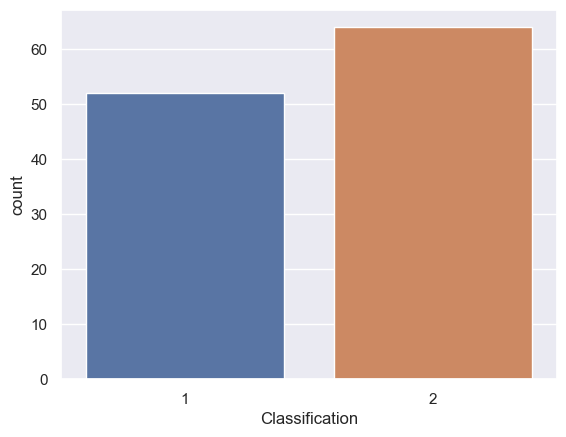

In [6]:
### Checking whether the class value is balanced or not
sns.countplot(df['Classification'])
print(df.Classification.value_counts())

<AxesSubplot:xlabel='Age'>

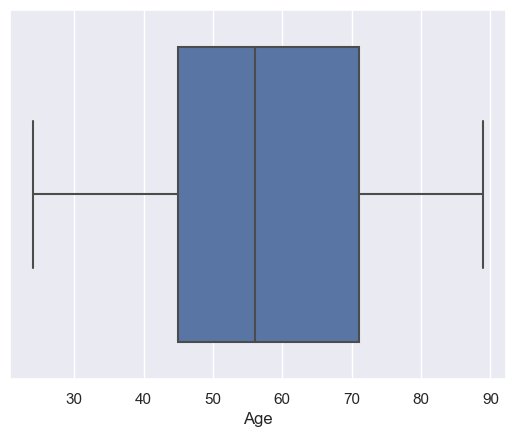

In [7]:
## Outlier Detection using Boxplot and Outlier Cleansing using Z-Score

sns.boxplot(x=df["Age"])

<AxesSubplot:xlabel='BMI'>

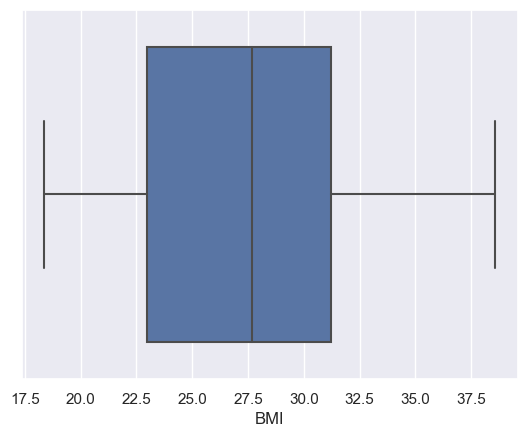

In [8]:
sns.boxplot(x=df["BMI"])

<AxesSubplot:xlabel='Glucose'>

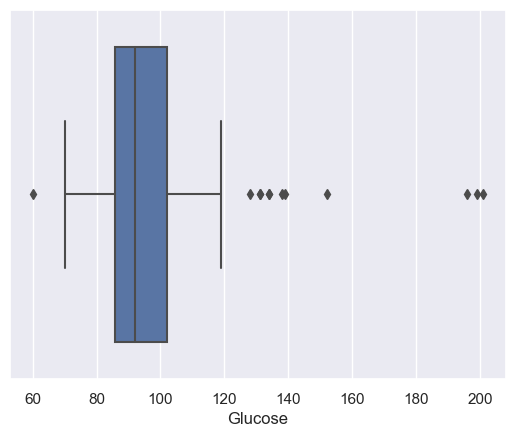

In [9]:
sns.boxplot(x=df["Glucose"])

<AxesSubplot:xlabel='Insulin'>

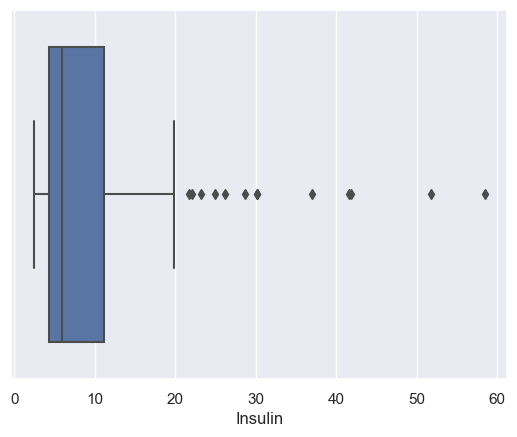

In [10]:
sns.boxplot(x=df["Insulin"])

<AxesSubplot:xlabel='HOMA'>

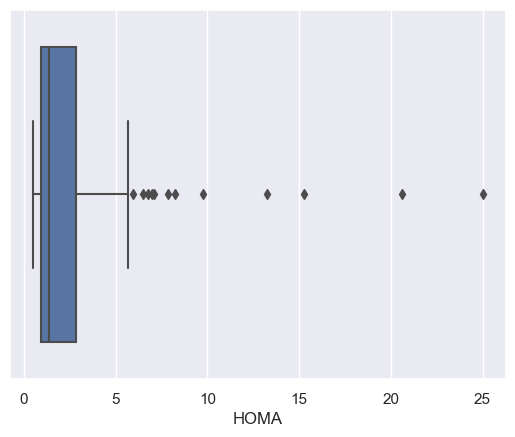

In [11]:
sns.boxplot(x=df["HOMA"])

<AxesSubplot:xlabel='Leptin'>

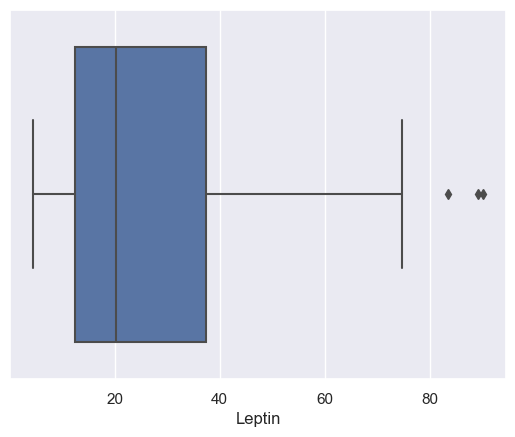

In [12]:
sns.boxplot(x=df["Leptin"])

<AxesSubplot:xlabel='Adiponectin'>

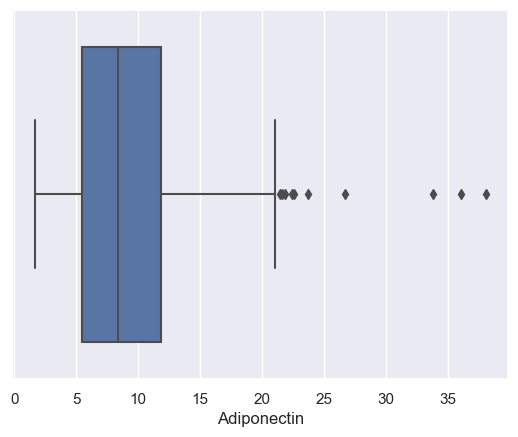

In [13]:
sns.boxplot(x=df["Adiponectin"])

<AxesSubplot:xlabel='Resistin'>

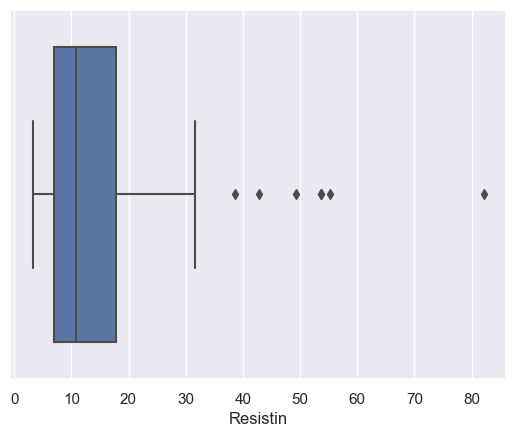

In [14]:
sns.boxplot(x=df["Resistin"])

<AxesSubplot:xlabel='MCP.1'>

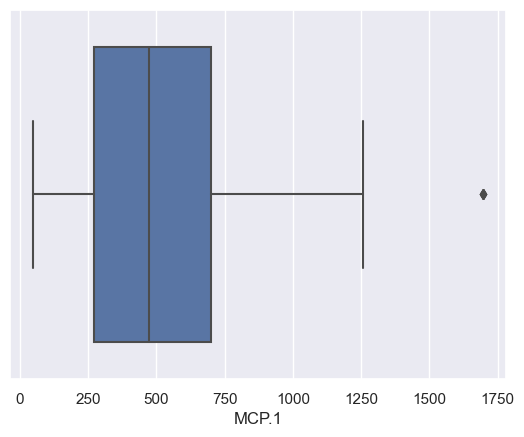

In [15]:
sns.boxplot(x=df["MCP.1"])

In [16]:
import scipy.stats as stats
z = np.abs(stats.zscore(df))
data_clean = df[(z<3).all(axis = 1)] 
data_clean.shape

(102, 10)

<AxesSubplot:>

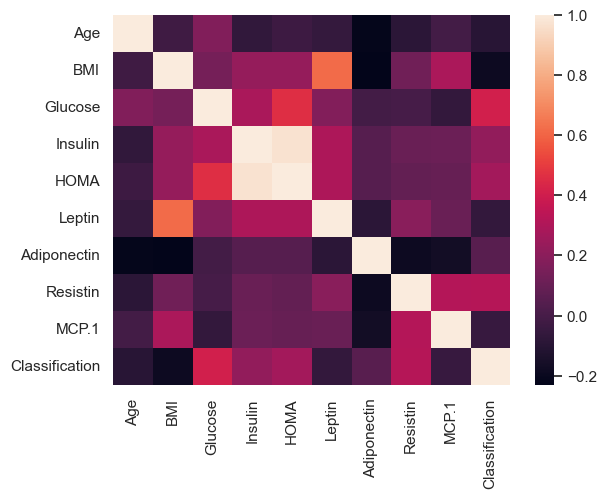

In [17]:
sns.heatmap(data_clean.corr())

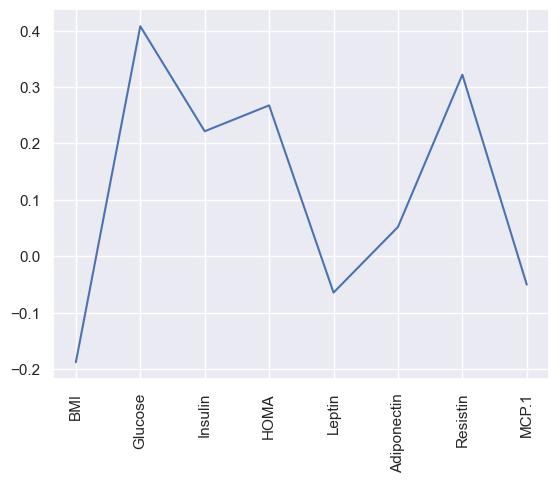

In [18]:
#### Correlation between Class and other attributes
corr = data_clean[data_clean.columns[1:]].corr()['Classification'][:-1]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

In [19]:
# Machine learning
X = data_clean.drop('Classification', axis=1)
y = data_clean['Classification']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,random_state=0)

In [21]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 0)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [22]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 90.91 %


In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.8571428571428571
Precision Score :  0.75
Recall Score :  1.0


In [24]:
## Random Forest classification
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [25]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 72.73 %


In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.5714285714285715
Precision Score :  0.5
Recall Score :  0.6666666666666666


In [27]:
## Support Vector Machine
from sklearn import svm
sv = svm.SVC(random_state = 0)
sv.fit(X_train, y_train)

SVC(random_state=0)

In [28]:
y_pred = sv.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 45.45 %


In [29]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.25
Precision Score :  0.2
Recall Score :  0.3333333333333333


In [30]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [31]:
y_pred = lr.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 81.82 %


In [32]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.7499999999999999
Precision Score :  0.6
Recall Score :  1.0
